In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mplsoccer.pitch import Pitch
import matplotlib.lines as mlines

from sklearn.cluster import KMeans

In [63]:
data = pd.read_csv('./Data/liverpool03_05_23.csv', index_col=0, low_memory=False)


In [64]:
df = data[(data['team_name']=='Liverpool')&(data['event_type']=='Pass')].reset_index()

In [65]:
df = df.loc[:, ['team_name', 'event_type' ,'outcomeType', 'x','y' , 'endX' , 'endY']]


In [66]:
#df = df[df['outcomeType']=='Successful']

In [67]:
X = np.array(df[['x','y','endX','endY']])
kmeans = KMeans(n_clusters = 6,random_state=80)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

In [68]:
df.cluster.value_counts()

2    118
3     90
0     84
5     77
4     70
1     69
Name: cluster, dtype: int64

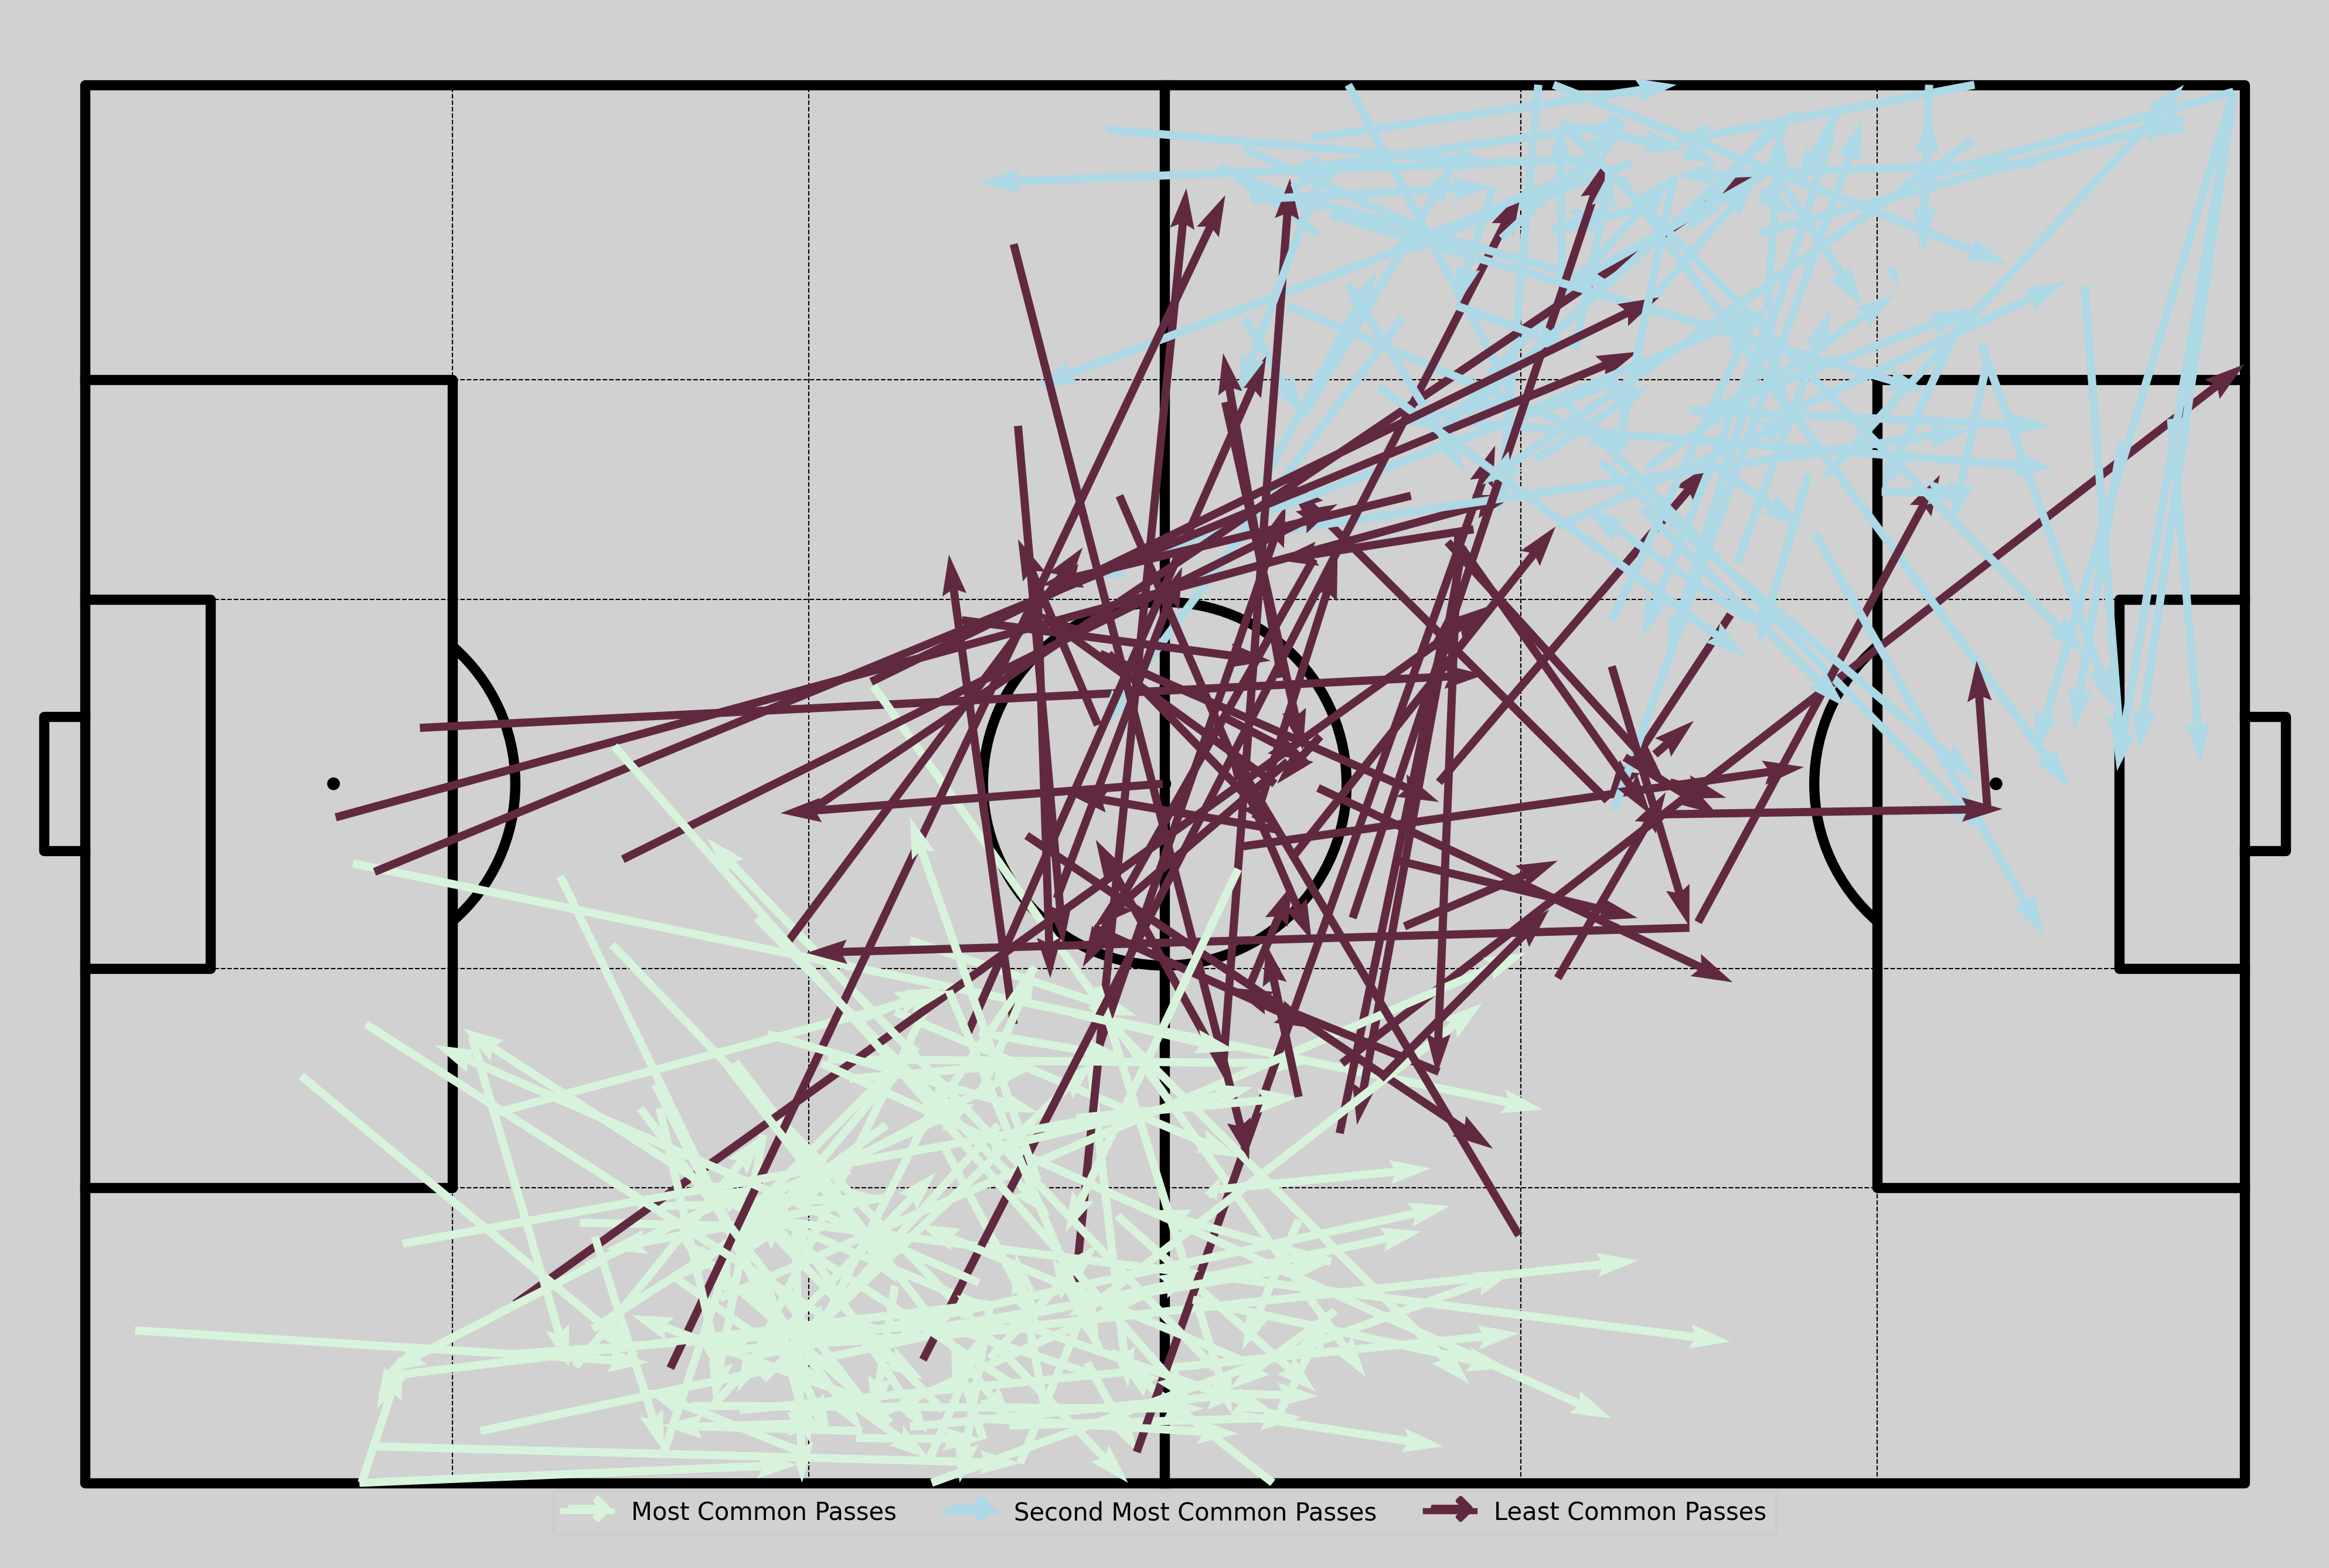

In [92]:
fig, ax = plt.subplots(figsize=(10,10),dpi = 500)
fig.set_facecolor('#D1D1D1')
ax.set_facecolor('#D1D1D1')


pitch = Pitch(
    pitch_color= '#D1D1D1',
    pitch_type='opta',
    goal_type='box',
    linewidth=2.5,
    line_color='black',
    half=False
)

pitch.draw(ax=ax)


pos_x = pitch.dim.positional_x
pos_y = pitch.dim.positional_y

for x in pos_x[1:-1]:
    ax.plot([x, x], [pos_y[0], pos_y[-1]], color='#000000', ls='dashed', zorder=0, lw=0.3)
for y in pos_y[1:-1]:
    ax.plot([pos_x[0], pos_x[-1]], [y, y], color='#000000', ls='dashed', zorder=0, lw=0.3)

for x in range(len(df['cluster'])):

    if df['cluster'][x] ==2:

        pitch.arrows(xstart=df['x'][x],ystart=df['y'][x],xend=df['endX'][x],yend=df['endY'][x],color ="#d8f3dc" ,width=2, ax=ax)


    if df['cluster'][x] ==3:
        pitch.arrows(xstart=df['x'][x],ystart=df['y'][x],xend=df['endX'][x],yend=df['endY'][x],
                   color='#add8e6', width =2,ax=ax)

    if df['cluster'][x] ==1:
        pitch.arrows(xstart=df['x'][x],ystart=df['y'][x],xend=df['endX'][x],yend=df['endY'][x],
                     color='#612940', width =2,  ax=ax)



# Create Line2D objects for each arrow color
common_pass = mlines.Line2D([], [], color='#d8f3dc', marker=r'$\rightarrow$', markersize=10, label='Most Common Passes')
second_common_pass = mlines.Line2D([], [], color='#add8e6', marker=r'$\rightarrow$', markersize=10, label='Second Most Common Passes')
least_common_pass = mlines.Line2D([], [], color='#612940', marker=r'$\rightarrow$', markersize=10, label='Least Common Passes')


# Create custom legend using Line2D objects
legend = ax.legend(handles=[common_pass, second_common_pass, least_common_pass], ncol=3, loc='upper center', fontsize=6, bbox_to_anchor=(.5, 0.04))
legend.get_frame().set_facecolor('#D1D1D1')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


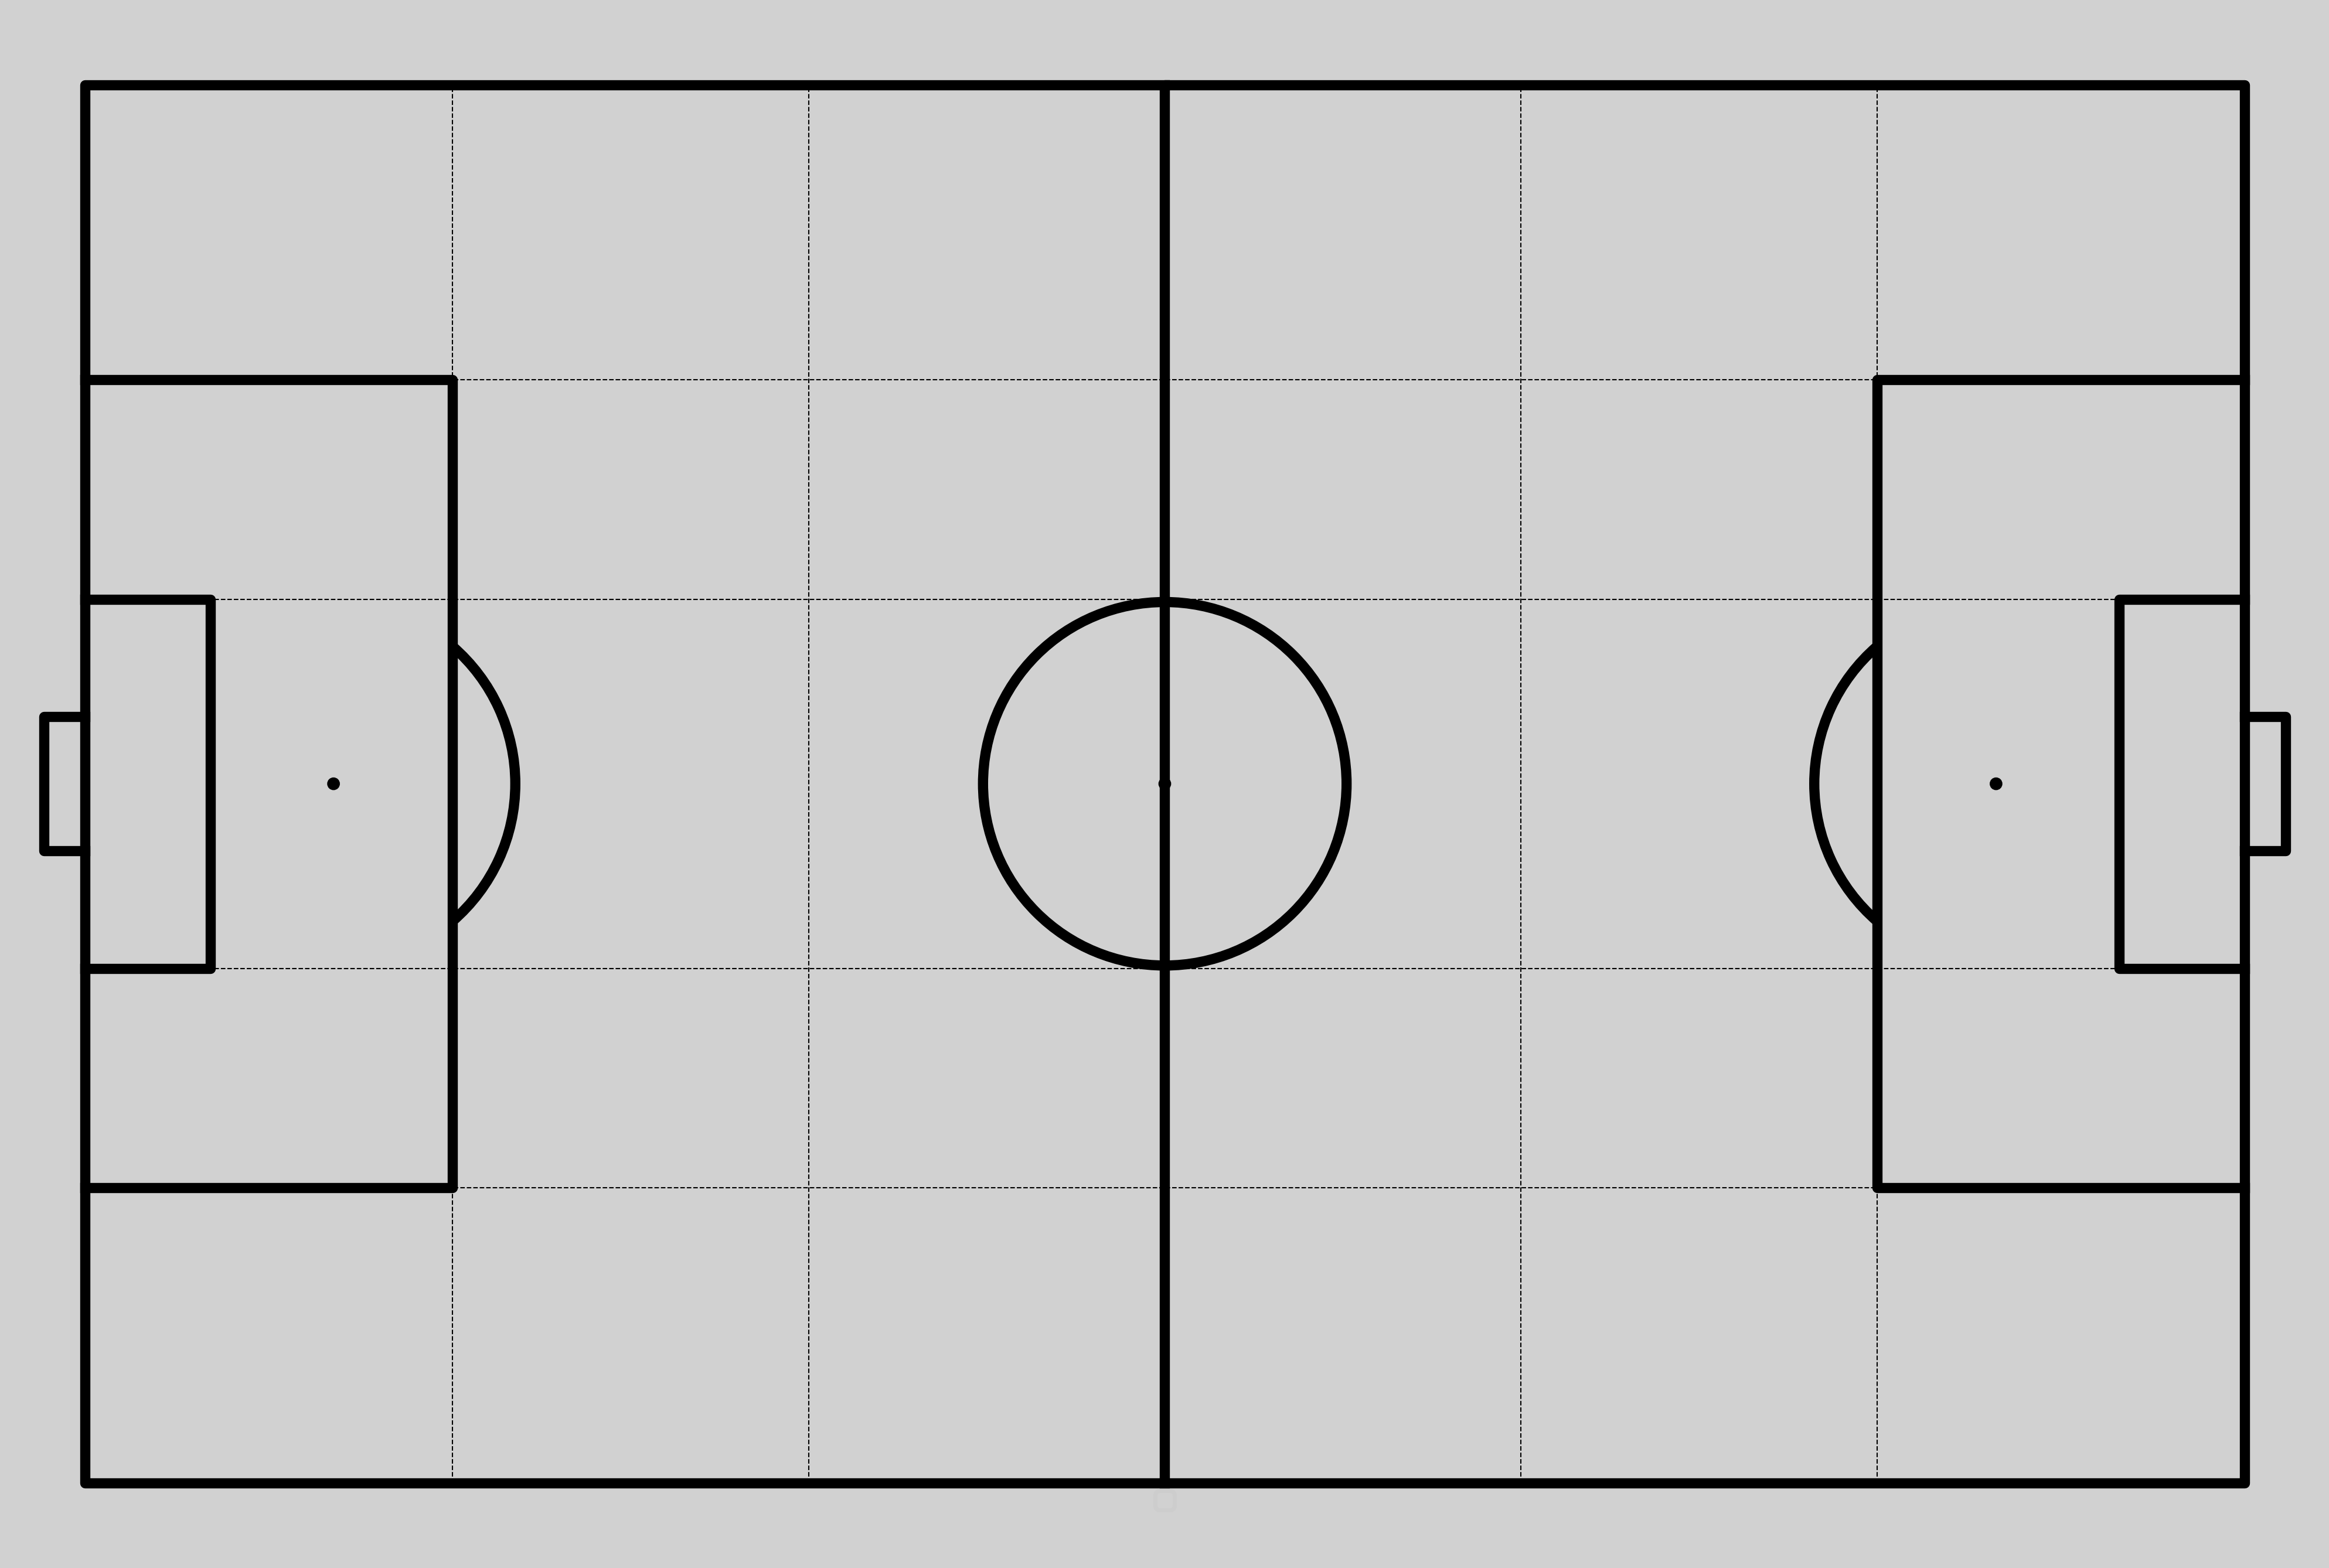

Oppostion Half

In [83]:
opp_half = data[(data['team_name']=='Liverpool')&(data['event_type']=='Pass')].reset_index()


In [84]:
opp_half = opp_half[opp_half['x'] > 100 - 100/2].reset_index(drop=True)

,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,...,index,id,match_string,team_name,Venue,xThreat,xThreat_gen,playerName,is_throw_or_corner,is_carry_into_box
0,5.0,0.0,9.0,32,65.7,59.9,0.0,1.0,NaN,Successful,...,6.0,2.516083e+09,Liverpool - Man Utd,Man Utd,Away,NaN,NaN,Fred,False,NaN
1,6.0,0.0,9.0,32,63.7,59.6,0.0,1.0,NaN,Unsuccessful,...,8.0,2.516083e+09,Liverpool - Man Utd,Man Utd,Away,NaN,NaN,Fred,False,NaN
2,7.0,0.0,13.0,32,64.4,73.0,0.0,1.0,NaN,Unsuccessful,...,10.0,2.516083e+09,Liverpool - Man Utd,Man Utd,Away,NaN,NaN,Bruno Fernandes,False,NaN
3,10.0,0.0,49.0,26,62.4,24.8,0.0,1.0,NaN,Successful,...,15.0,2.516083e+09,Liverpool - Man Utd,Liverpool,Home,NaN,NaN,Cody Gakpo,False,NaN
4,11.0,1.0,31.0,26,65.8,23.7,1.0,1.0,NaN,Unsuccessful,...,17.0,2.516084e+09,Liverpool - Man Utd,Liverpool,Home,NaN,NaN,Trent Alexander-Arnold,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,869.5,92.0,16.5,26,63.5,97.4,94.0,2.0,"{'value': 99, 'displayName': 'Carry'}",Successful,...,NaN,NaN,NaN,NaN,NaN,0.003382,0.003382,Andrew Robertson,False,NaN
684,870.0,92.0,19.0,26,68.8,96.6,94.0,2.0,NaN,Successful,...,1406.0,2.516159e+09,Liverpool - Man Utd,Liverpool,Home,0.176590,0.176590,Andrew Robertson,False,NaN
685,871.0,92.0,23.0,26,92.6,59.3,94.0,2.0,NaN,Unsuccessful,...,1407.0,2.516159e+09,Liverpool - Man Utd,Liverpool,Home,NaN,NaN,Diogo Jota,False,NaN
686,11580.0,71.0,NaN,32,57.4,46.8,73.0,2.0,NaN,Unsuccessful,...,1138.0,2.516157e+09,Liverpool - Man Utd,Man Utd,Away,NaN,NaN,Bruno Fernandes,NaN,NaN


In [85]:
opp_half = opp_half.loc[:, ['team_name', 'event_type' ,'outcomeType', 'x','y' , 'endX' , 'endY']]


In [86]:
X = np.array(opp_half[['x','y','endX','endY']])
kmeans = KMeans(n_clusters = 4,random_state=80)
kmeans.fit(X)
opp_half['cluster'] = kmeans.predict(X)

In [87]:
opp_half.cluster.value_counts()

0    88
3    63
1    43
2    35
Name: cluster, dtype: int64

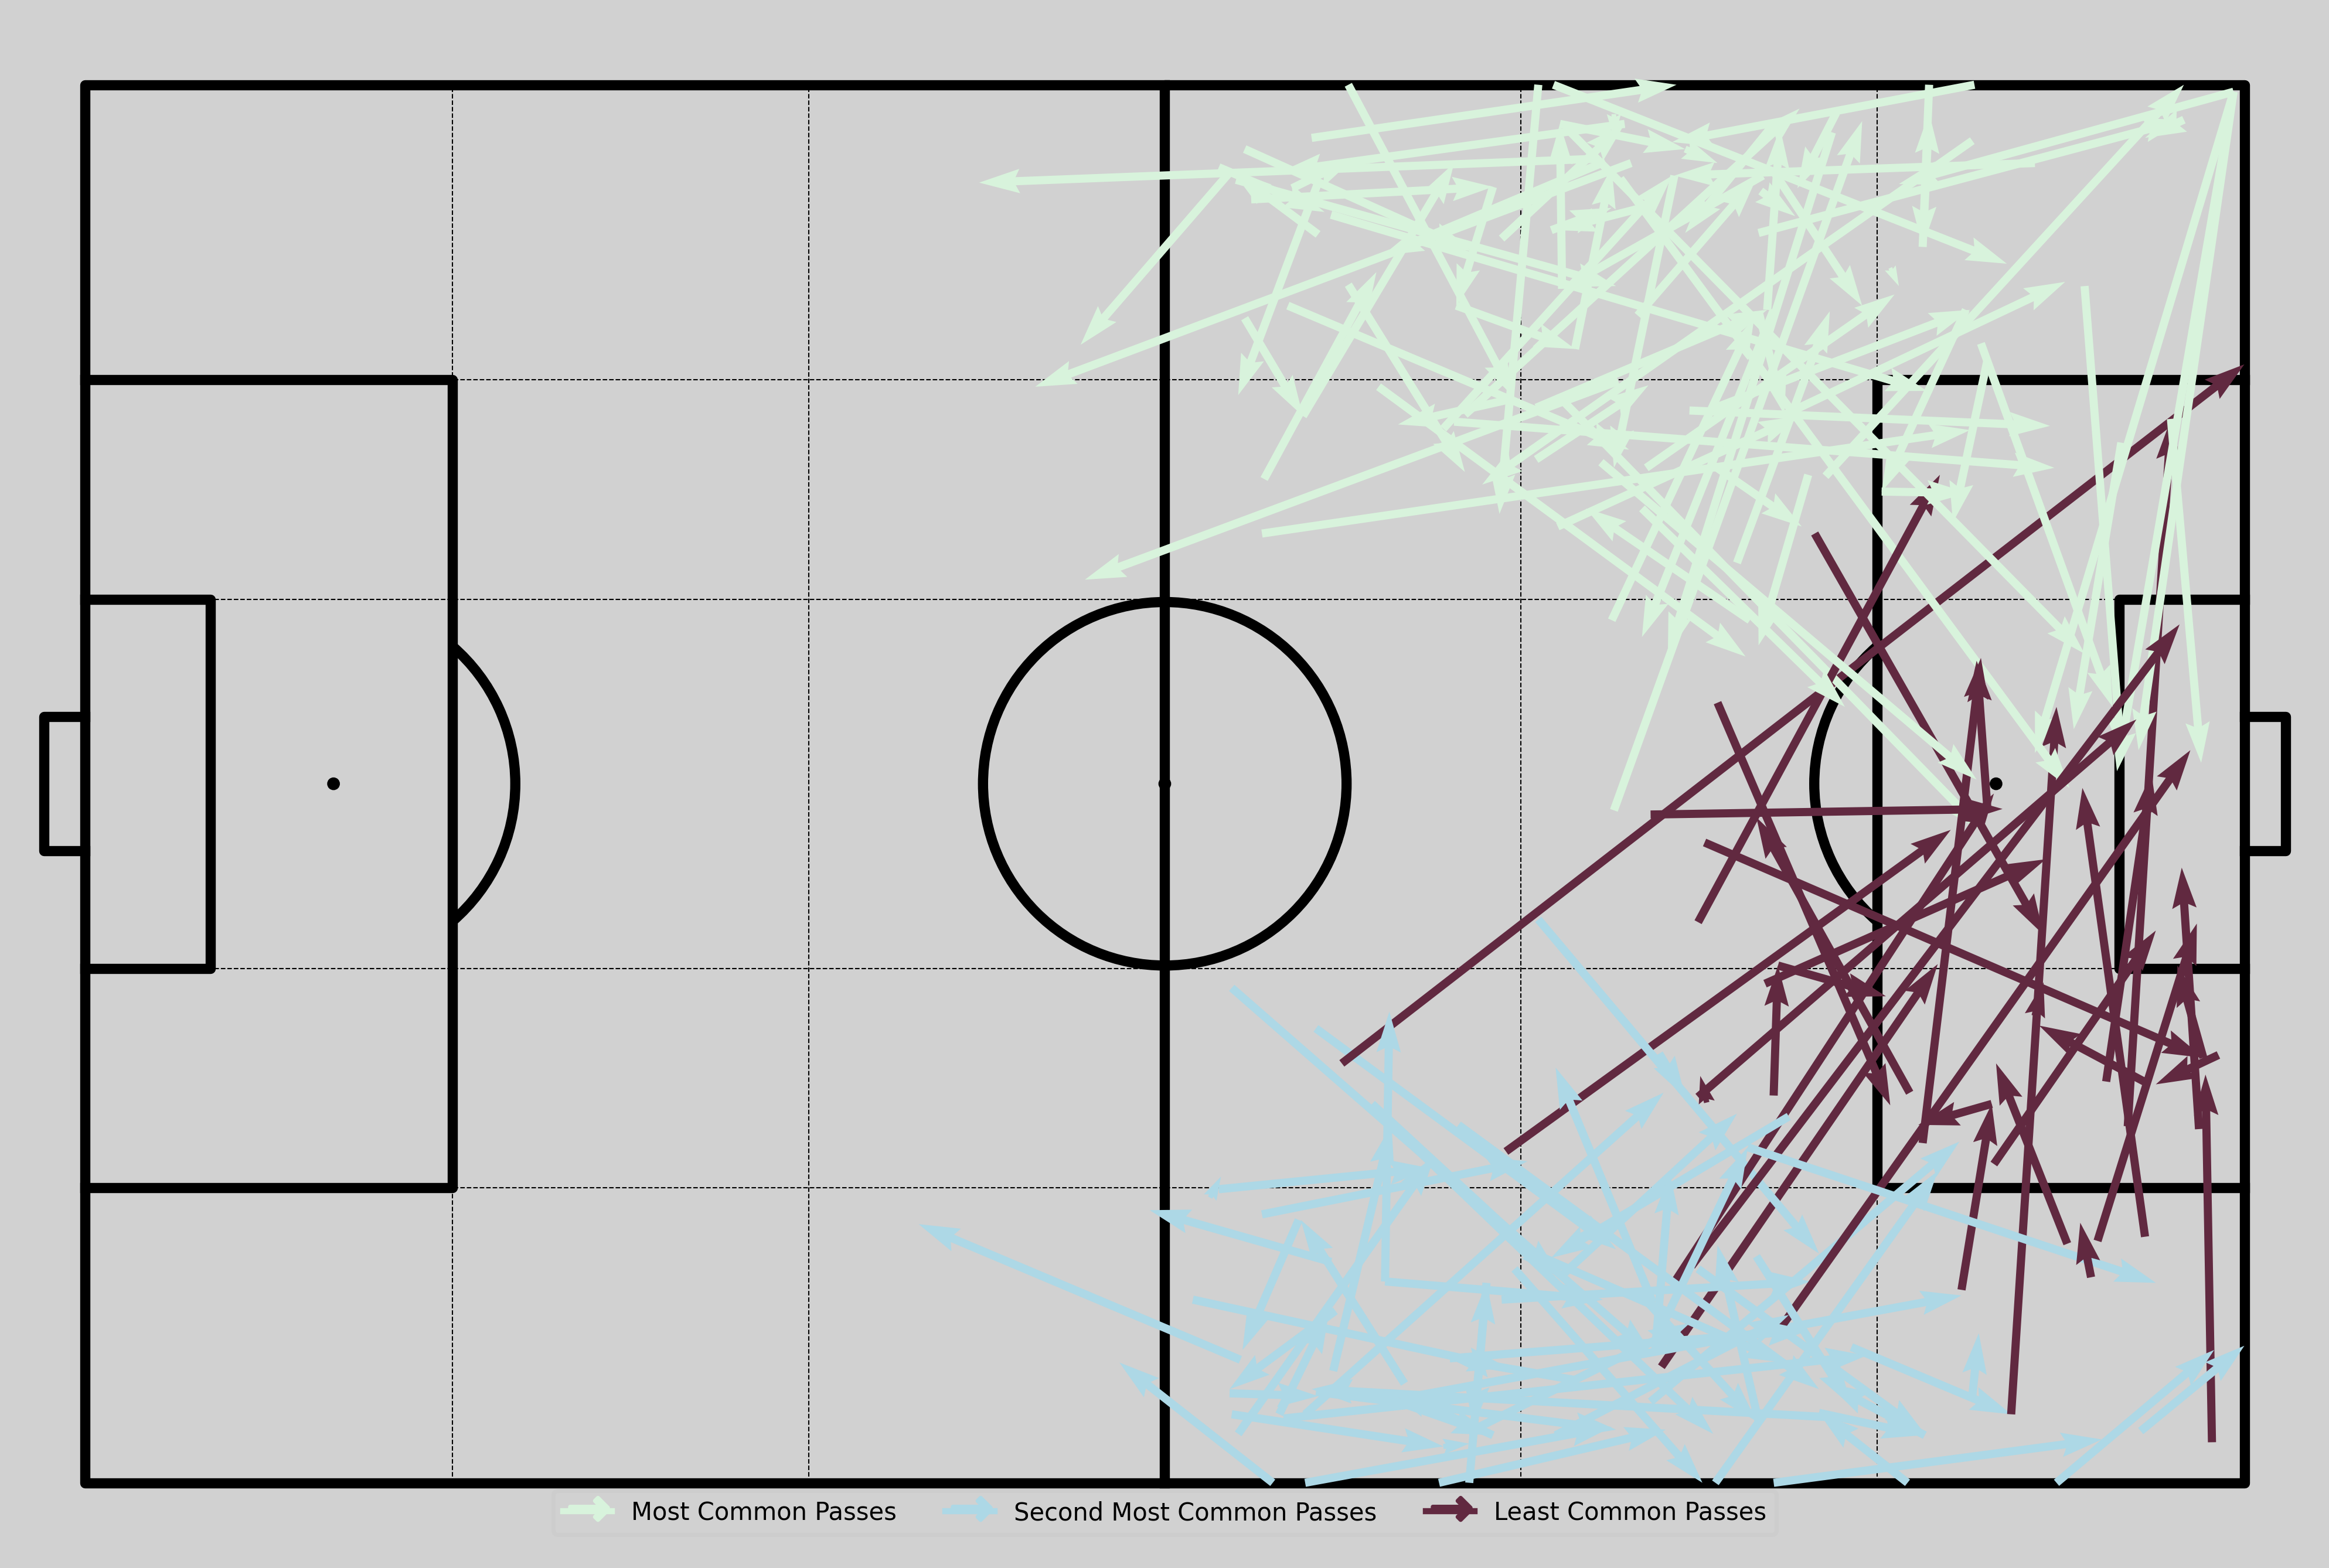

In [91]:
fig, ax = plt.subplots(figsize=(10,10),dpi = 500)
fig.set_facecolor('#D1D1D1')
ax.set_facecolor('#D1D1D1')


pitch = Pitch(
    pitch_color= '#D1D1D1',
    pitch_type='opta',
    goal_type='box',
    linewidth=2.5,
    line_color='black',
    half=False
)

pitch.draw(ax=ax)


pos_x = pitch.dim.positional_x
pos_y = pitch.dim.positional_y

for x in pos_x[1:-1]:
    ax.plot([x, x], [pos_y[0], pos_y[-1]], color='#000000', ls='dashed', zorder=0, lw=0.3)
for y in pos_y[1:-1]:
    ax.plot([pos_x[0], pos_x[-1]], [y, y], color='#000000', ls='dashed', zorder=0, lw=0.3)

for x in range(len(opp_half['cluster'])):

    if opp_half['cluster'][x] ==0:

        pitch.arrows(xstart=opp_half['x'][x],ystart=opp_half['y'][x],xend=opp_half['endX'][x],yend=opp_half['endY'][x],color ="#d8f3dc" ,width=2, ax=ax)


    if opp_half['cluster'][x] ==3:
        pitch.arrows(xstart=opp_half['x'][x],ystart=opp_half['y'][x],xend=opp_half['endX'][x],yend=opp_half['endY'][x],
                   color='#add8e6', width =2,ax=ax)

    if opp_half['cluster'][x] ==2:
        pitch.arrows(xstart=opp_half['x'][x],ystart=opp_half['y'][x],xend=opp_half['endX'][x],yend=opp_half['endY'][x],
                     color='#612940', width =2,  ax=ax)


# Create Line2D objects for each arrow color
common_pass = mlines.Line2D([], [], color='#d8f3dc', marker=r'$\rightarrow$', markersize=10, label='Most Common Passes')
second_common_pass = mlines.Line2D([], [], color='#add8e6', marker=r'$\rightarrow$', markersize=10, label='Second Most Common Passes')
least_common_pass = mlines.Line2D([], [], color='#612940', marker=r'$\rightarrow$', markersize=10, label='Least Common Passes')


# Create custom legend using Line2D objects
legend = ax.legend(handles=[common_pass, second_common_pass, least_common_pass], ncol=3, loc='upper center', fontsize=6, bbox_to_anchor=(.5, 0.04))
legend.get_frame().set_facecolor('#D1D1D1')
